# Visualization with Bar Chart and Stack Bar Chart

Bar chart is useful to visualize frequency, and scatter plot visualize the correlation.

In [4]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's create a dummy data of 1000 of middle school students that has ID number, their grades, gender and their favourite subject. 

In [5]:
num_students = 1000
std_id = range(1,num_students+1)
grade_level = np.random.choice(['7th', '8th', '9th'], num_students)
gender = np.random.choice(['Male', 'Female'], num_students)
fav_subject = np.random.choice(['Math', 'Science', 'History', 'English', 'Art'], num_students)

After all data is generated, it is time to put it in a dataframe using pandas.

In [6]:
students = pd.DataFrame({'Student_ID': std_id,
                         'Grade_Level': grade_level,
                         'Gender': gender,
                         'Subject':fav_subject})

```students``` is the dataframe object that contains 4 columns. To get data preview, use ```head()``` to get first 5 data, and use ```tail()``` for the last 5 data.

In [7]:
students.head()

,Student_ID,Grade_Level,Gender,Subject
0,1,9th,Male,Math
1,2,7th,Male,Science
2,3,9th,Male,Science
3,4,8th,Male,Science
4,5,9th,Male,English


### Bar Chart

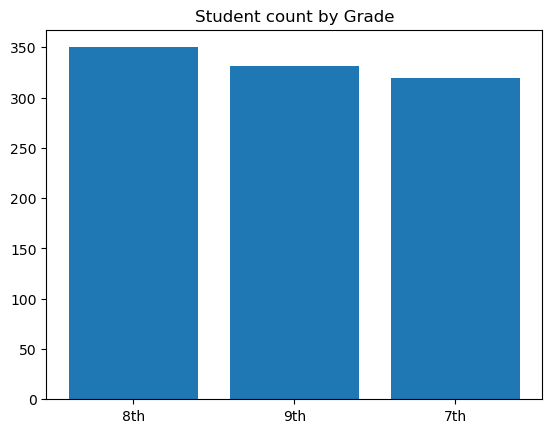

In [8]:
grade_count = students['Grade_Level'].value_counts()
x = grade_count.index
y = grade_count.values

plt.bar(x,y)
plt.title("Student count by Grade")
plt.show()

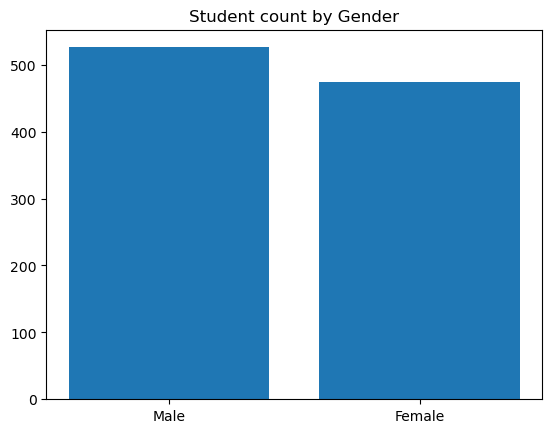

In [9]:
gender_count = students['Gender'].value_counts()
x = gender_count.index
y = gender_count.values

plt.bar(x,y)
plt.title("Student count by Gender")
plt.show()

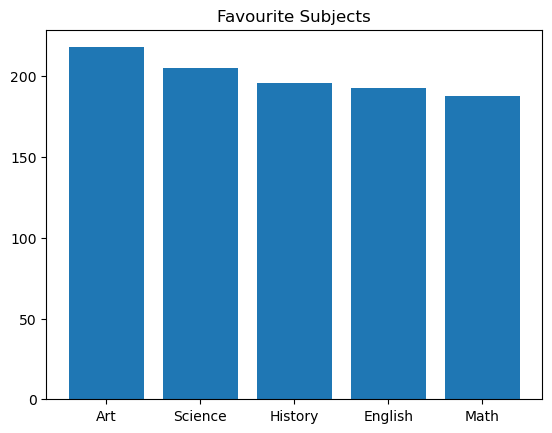

In [10]:
subject_count = students['Subject'].value_counts()
x = subject_count.index
y = subject_count.values

plt.bar(x,y)
plt.title("Favourite Subjects")
plt.show()

#### Stacked Bar Chart

 Each bar in the chart represents a total sum, and segments within the bar represent different categories that contribute to that total. The height of the bar indicates the total sum, while the segments represent the proportion contributed by each category.

For example we would like to visualize the comparison of number of students in each favourite subject between grades.

To do it, we need to combine multiple categories and therefore we use ```groupby()``` function. To get the count of the groupings, use ```size()```.

In [42]:
subject_count = students.groupby(['Grade_Level', 'Subject']).size()
subject_count

Grade_Level  Subject
7th          Art        69
             English    59
             History    63
             Math       61
             Science    67
8th          Art        72
             English    66
             History    70
             Math       73
             Science    69
9th          Art        77
             English    68
             History    63
             Math       54
             Science    69
dtype: int64

Output above is in ```Series``` datatype. To give a title to the count column, we need to transform it to dataframe type by reseting the index.

In [43]:
subject_count = subject_count.reset_index(name='Count')
subject_count

,Grade_Level,Subject,Count
0,7th,Art,69
1,7th,English,59
2,7th,History,63
3,7th,Math,61
4,7th,Science,67
5,8th,Art,72
6,8th,English,66
7,8th,History,70
8,8th,Math,73
9,8th,Science,69


To stack the boxplot, we need to transform the table to pivot table where the column name is the subject and row is the grade.

In [44]:
subject_count_pivot = subject_count.pivot(index='Grade_Level',columns='Subject',values='Count')
subject_count_pivot

Subject,Art,English,History,Math,Science
Grade_Level,,,,,
7th,69,59,63,61,67
8th,72,66,70,73,69
9th,77,68,63,54,69


We are now ready to make the stacked bar chart.

<Axes: xlabel='Grade_Level'>

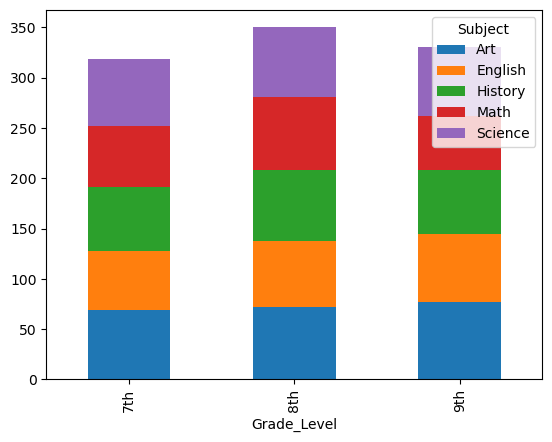

In [28]:
subject_count_pivot.plot(kind='bar', stacked=True)